In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D, BatchNormalization

In [ ]:

import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/New_120dog breeds-299.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/projectDataset299')


with zipfile.ZipFile('/content/drive/MyDrive/New_120dog breeds-224.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/projectDataset224')

In [ ]:
import pathlib
from keras.preprocessing.image import ImageDataGenerator

data_dir1 = pathlib.Path('/content/projectDataset299/New_120dog breeds-299')

data_train1 = data_dir1 / 'train'

# data_test1 = data_dir1 / 'test'


data_dir = pathlib.Path('/content/projectDataset224/New_120dog breeds-224')

data_train = data_dir / 'train'

# data_test = data_dir / 'test'

labels_csv = pd.read_csv('/content/drive/MyDrive/labelsNew.csv')
labels_csv['id'] = [str(fname) + '.jpg' for fname in labels_csv['id']]

In [ ]:
batch_size = 16
img_size = 224
img_size1 = 299

In [ ]:
datagen1 = ImageDataGenerator(preprocessing_function = keras.applications.vgg16.preprocess_input, validation_split=0.2)
datagen2 = ImageDataGenerator(preprocessing_function = keras.applications.resnet50.preprocess_input, validation_split=0.2)
datagen3 = ImageDataGenerator(preprocessing_function = keras.applications.inception_v3.preprocess_input, validation_split=0.2)

def generate_generator_multiple():
    genX1 = datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train1,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        # class_mode="sparse",
                        class_mode='categorical',
                        color_mode="rgb",
                        target_size=(img_size1, img_size1))

    genX2 = datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train1,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        # class_mode="sparse",
                        class_mode='categorical',
                        color_mode="rgb",
                        target_size=(img_size1, img_size1))

    genX3 = datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train1,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        # class_mode="sparse",
                        class_mode='categorical',
                        color_mode="rgb",
                        target_size=(img_size1, img_size1))
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            X3i = genX3.next()
            yield [X1i[0], X2i[0],X3i[0]], X3i[1]  #Yield both images and their mutual label

def generate_generator_multiple2():
    genX1 = datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train1,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        # class_mode="sparse",
                        class_mode='categorical',
                        color_mode="rgb",
                        target_size=(img_size1, img_size1))

    genX2 = datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train1,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        # class_mode="sparse",
                        class_mode='categorical',
                        color_mode="rgb",
                        target_size=(img_size1, img_size1))

    genX3 = datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train1,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        # class_mode="sparse",
                        class_mode='categorical',
                        color_mode="rgb",
                        target_size=(img_size1, img_size1))
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            X3i = genX3.next()
            yield [X1i[0], X2i[0],X3i[0]], X3i[1]  #Yield both images and their mutual label

inputgenerator=generate_generator_multiple()
validation_generator=generate_generator_multiple()

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.metrics import AUC
from sklearn.metrics import roc_curve, auc

# Define the ROC metrics
tpr = tf.keras.metrics.TruePositives(name='tp')
fpr = tf.keras.metrics.FalsePositives(name='fp')
auc_metric = AUC(name='auc')

In [ ]:
vgg16 = applications.vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
resnet50 = keras.applications.ResNet50(include_top=False, weights='imagenet',input_shape=(224,224,3))
inceptionV3 = applications.inception_v3.InceptionV3(include_top=False, weights='imagenet',input_shape=(299,299,3))

for layer in vgg16 .layers:
    layer.trainable=False
for layer in resnet50.layers:
    layer.trainable=False
for layer in inceptionV3.layers:
    layer.trainable=False

model1 = Sequential()
model2 = Sequential()
model3 = Sequential()

model1.add(vgg16)
model1.add(BatchNormalization())
model1.add(GlobalAveragePooling2D())
model1.add(Dropout(0.5))
model1.add(Dense(1024, activation='leaky_relu'))
model1.add(Dropout(0.5))
model1.add(Dense(256, activation='leaky_relu'))
model1.add(Dropout(0.5))
model1.add(Dense(120, activation='softmax'))

model2.add(resnet50)
model2.add(BatchNormalization())
model2.add(GlobalAveragePooling2D())
model2.add(Dropout(0.5))
model2.add(Dense(1024, activation='leaky_relu'))
model2.add(Dropout(0.5))
model2.add(Dense(120, activation='softmax'))

model3.add(inceptionV3)
model3.add(BatchNormalization())
model3.add(GlobalAveragePooling2D())
model3.add(Dropout(0.5))
model3.add(Dense(1024, activation='leaky_relu'))
model3.add(Dropout(0.5))
model3.add(Dense(120, activation='softmax'))

optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001)
model1.compile(optimizer=optimizer,
              #  loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              #  metrics=['accuracy'])
              metrics=[tpr, fpr, auc_metric, 'accuracy', 'Precision', 'Recall'])
model2.compile(optimizer=optimizer,
              #  loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              #  metrics=['accuracy'])
              metrics=[tpr, fpr, auc_metric, 'accuracy', 'Precision', 'Recall'])
model3.compile(optimizer=optimizer,
              #  loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              #  metrics=['accuracy'])
              metrics=[tpr, fpr, auc_metric, 'accuracy', 'Precision', 'Recall'])

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
models = []
models.append(model1)
models.append(model2)
models.append(model3)
ensemble_visible = [model.input for model in models]
ensemble_outputs = [model.output for model in models]
merge = tf.keras.layers.concatenate(ensemble_outputs)
merge = tf.keras.layers.BatchNormalization()(merge)
merge = tf.keras.layers.Dense(1024, activation='relu')(merge)
merge = tf.keras.layers.Dropout(0.5)(merge)
output = tf.keras.layers.Dense(120, activation='softmax')(merge)
ensemble_model = tf.keras.models.Model(inputs=ensemble_visible, outputs=output)
ensemble_model.compile(optimizer=optimizer,
                      # loss='sparse_categorical_crossentropy',
                      loss='categorical_crossentropy',
                      #  metrics=['accuracy'])
                      metrics=[tpr, fpr, auc_metric, 'accuracy', 'Precision', 'Recall'])
ensemble_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 vgg16_input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['vgg16_input[0][0]']            
                                                                                                  
 batch_normalization_94 (BatchN  (None, 7, 7, 512)   2048        ['vgg16[0][0]']                  
 ormalization)                                                                                    
                                                                                              

In [ ]:
history_ens = ensemble_model.fit(inputgenerator, epochs=20, verbose = 1,
                                #  steps_per_epoch = 8178/batch_size,
                                #  validation_steps = 2044/batch_size,
                                 steps_per_epoch = 7218/batch_size,
                                 validation_steps = 1804/batch_size,
                                 validation_data=validation_generator)

Found 7218 validated image filenames belonging to 120 classes.
Found 7218 validated image filenames belonging to 120 classes.
Found 7218 validated image filenames belonging to 120 classes.
Epoch 1/20
452/451 [==============================] - ETA: 0s - loss: 4.5497 - tp: 0.0000e+00 - fp: 0.0000e+00 - auc: 0.5779 - accuracy: 0.1173 - precision: 0.0000e+00 - recall: 0.0000e+00Found 7218 validated image filenames belonging to 120 classes.
Found 7218 validated image filenames belonging to 120 classes.
Found 7218 validated image filenames belonging to 120 classes.
451/451 [==============================] - 210s 402ms/step - loss: 4.5497 - tp: 0.0000e+00 - fp: 0.0000e+00 - auc: 0.5779 - accuracy: 0.1173 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.2996 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_auc: 0.6993 - val_accuracy: 0.4773 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
451/451 [==============================] - 169s 376ms/step - loss: 3.3070 - tp: 37

In [ ]:
# Save model
ensemble_model.save('/content/drive/MyDrive/Ensemble_StackingNew120breeds_NoDAEarlyStoppingVersion6.h5')

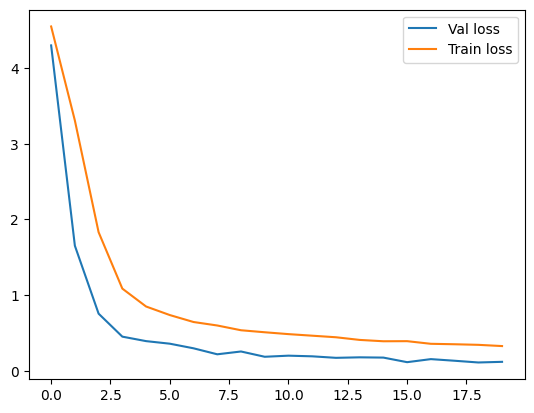

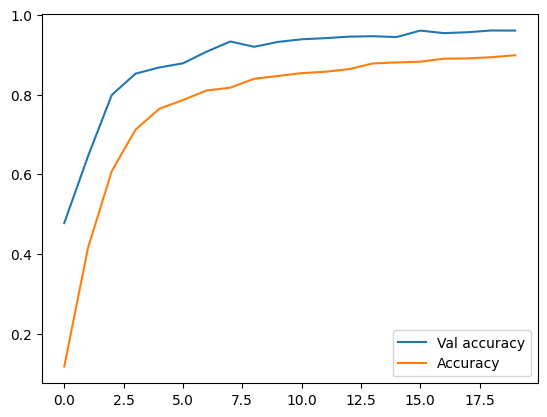

In [ ]:
plt.figure()
plt.plot(history_ens .history["val_loss"], label = "Val loss")
plt.plot(history_ens .history["loss"], label = "Train loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(history_ens .history["val_accuracy"], label = "Val accuracy")
plt.plot(history_ens .history["accuracy"], label = "Accuracy")
plt.legend()
plt.show()

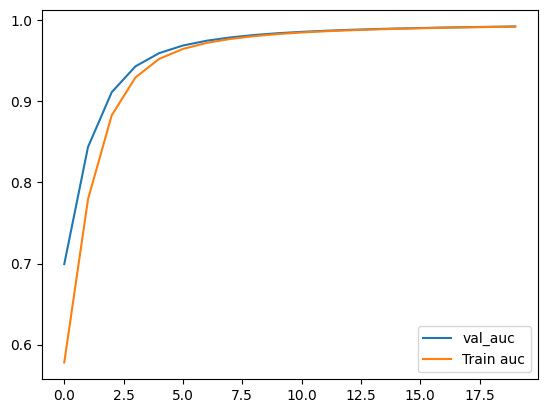

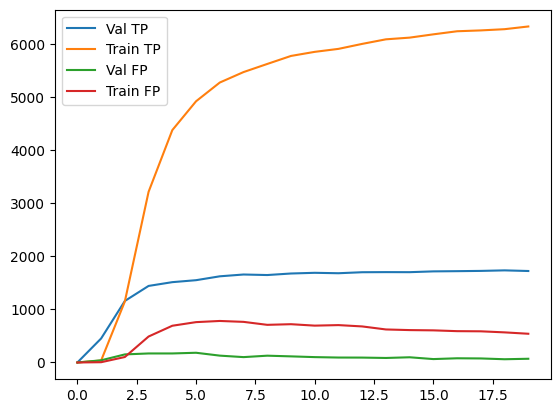

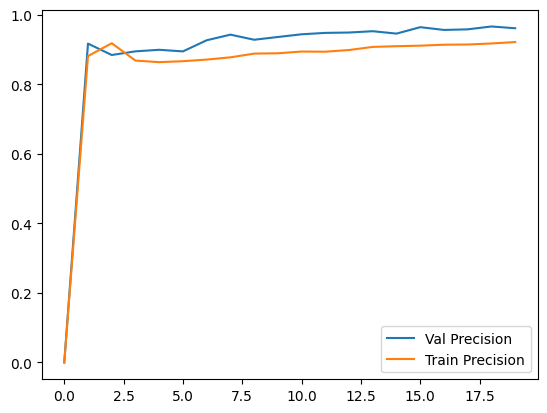

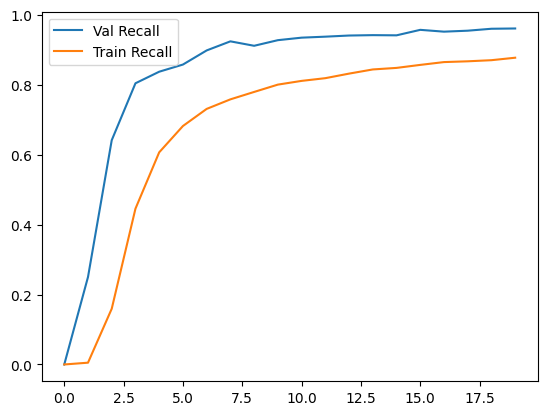

In [ ]:
plt.figure()
plt.plot(history_ens .history['val_auc'], label = 'val_auc')
plt.plot(history_ens .history['auc'], label = 'Train auc')
plt.legend()
plt.show()

plt.figure()
plt.plot(history_ens .history['val_tp'], label = 'Val TP')
plt.plot(history_ens .history['tp'], label = 'Train TP')
plt.plot(history_ens .history['val_fp'], label = 'Val FP')
plt.plot(history_ens .history['fp'], label = 'Train FP')
plt.legend()
plt.show()

plt.figure()
plt.plot(history_ens .history['val_precision'], label = 'Val Precision')
plt.plot(history_ens .history['precision'], label = 'Train Precision')
plt.legend()
plt.show()

plt.figure()
plt.plot(history_ens .history['val_recall'], label = 'Val Recall')
plt.plot(history_ens .history['recall'], label = 'Train Recall')
plt.legend()
plt.show()